In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

%matplotlib inline

In [126]:
path = 'open_data/'

train = pd.read_csv(path + 'train.csv', encoding='cp949')
print(train.shape)
train.head(2)

(19008, 5)


,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259


In [127]:
train.describe()

,사용자,세션,신규방문자,페이지뷰
count,19008.000000,19008.000000,19008.000000,19008.000000
mean,45.633944,45.280356,11.169613,1009.841435
std,55.111373,54.534009,15.108557,1588.200273
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,2.000000,69.000000
50%,21.000000,21.000000,6.000000,270.000000
75%,70.000000,70.000000,15.000000,1277.000000
max,668.000000,815.000000,335.000000,27884.000000


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


In [129]:
train['data'] = train['DateTime'].astype('object').apply(lambda x : x.split()[0])
train['hour'] = train['DateTime'].astype('object').apply(lambda x : x.split()[1][:2])
train['time'] = train['data'] + ' ' + train['hour']

train.head(2)

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01


### 하루 기준으로 Group

In [130]:
train_group = train.groupby('data').sum()
train_group.head(2)

,사용자,세션,신규방문자,페이지뷰
data,,,,
2018-09-09,281,266,73,1826
2018-09-10,264,247,51,2092


<AxesSubplot:xlabel='data', ylabel='페이지뷰'>

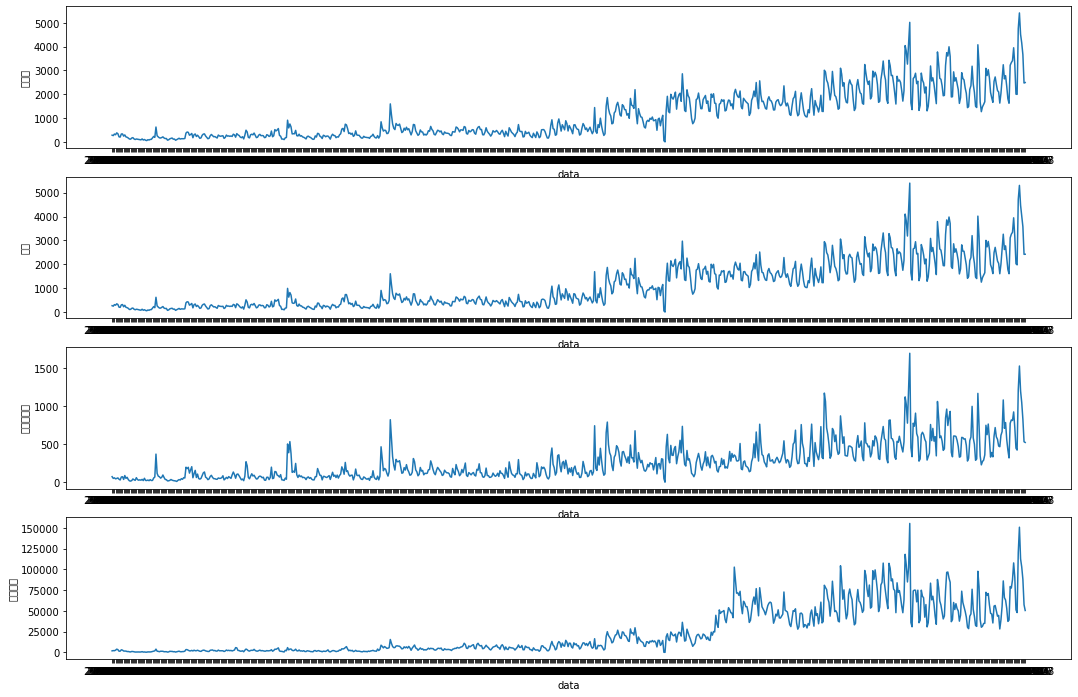

In [52]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(18,12)

sns.lineplot(data=train_group, x = 'data', y = '사용자', ax=axes[0])
sns.lineplot(data=train_group, x = 'data', y = '세션', ax=axes[1])
sns.lineplot(data=train_group, x = 'data', y = '신규방문자', ax=axes[2])
sns.lineplot(data=train_group, x = 'data', y = '페이지뷰', ax=axes[3])

### 시간 기준으로 Group

In [131]:
train_group_time = train.groupby('hour').sum()
train_group_time.head(2)

,사용자,세션,신규방문자,페이지뷰
hour,,,,
00,36646,40163,8019,842892
01,23019,21567,4887,493863


<AxesSubplot:xlabel='time', ylabel='페이지뷰'>

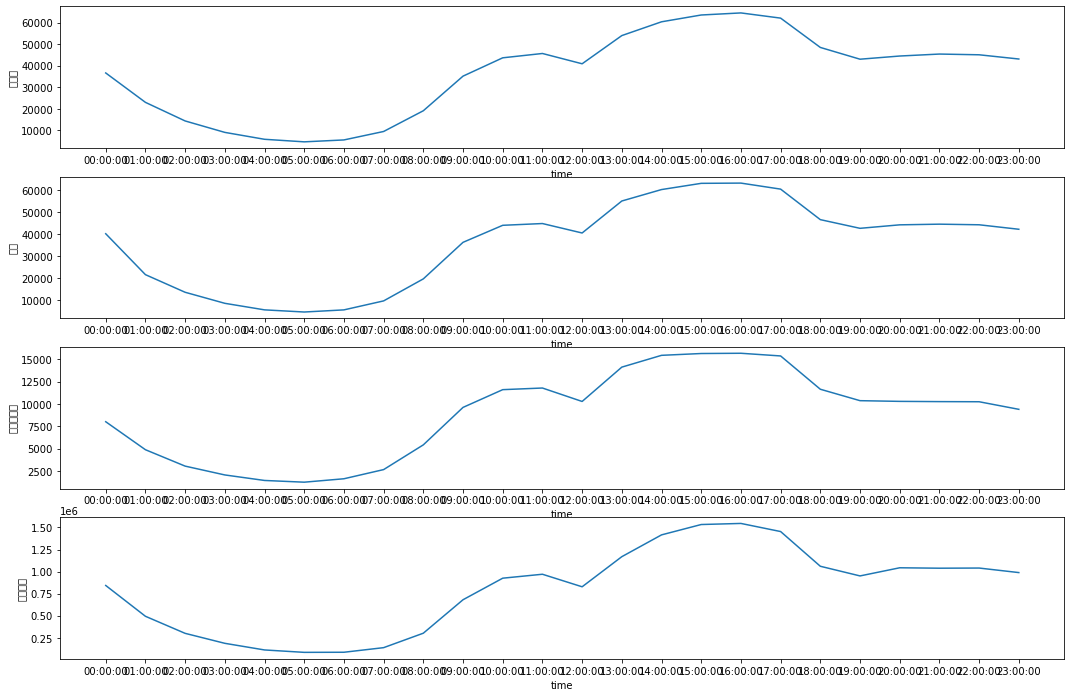

In [55]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(18,12)

sns.lineplot(data=train_group_time, x = 'hour', y = '사용자', ax=axes[0])
sns.lineplot(data=train_group_time, x = 'hour', y = '세션', ax=axes[1])
sns.lineplot(data=train_group_time, x = 'hour', y = '신규방문자', ax=axes[2])
sns.lineplot(data=train_group_time, x = 'hour', y = '페이지뷰', ax=axes[3])

### info_user

In [132]:
info_user = pd.read_csv(path + 'info_user.csv', encoding='cp949').set_index('Unnamed: 0').dropna(axis = 0)

info_user.head()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
Unnamed: 0,,,,,,,,
0.0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
1.0,19195.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2.0,16339.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3.0,7290.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4.0,21287.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0


In [133]:
info_user['c_time'] = info_user['c_time'].astype('object')
info_user['c_data'] = info_user['c_time'].apply(lambda x : x.split()[0])
info_user['c_time'] = info_user['c_time'].apply(lambda x : x.split()[1])
info_user['c_time'] = info_user['c_time'].apply(lambda x : '0' + x[0] if len(x) == 4 else x[:2]) # 시간 단위 동일하게

info_user['time'] = info_user['c_data'] + ' ' + info_user['c_time']

info_user.head(2)

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level,c_data,time
Unnamed: 0,,,,,,,,,,
0.0,15994.0,23,94.0,306.0,477.0,82.0,1.0,1.0,2017-05-02,2017-05-02 23
1.0,19195.0,18,1.0,0.0,0.0,82.0,1.0,1.0,2018-08-08,2018-08-08 18


In [142]:
new_info_user = info_user.groupby('time').count().reset_index()[['time', 'id']]
new_info_user.head()

,time,id
0,2017-05-02 23,1
1,2018-08-08 18,1
2,2018-08-08 19,2
3,2018-08-08 20,2
4,2018-08-08 21,1


In [166]:
# 누적 가입자
# '2018-09-09-00'까지 469명 가입
train['new_user'] = pd.merge(train[['time']], new_info_user, how = 'left').fillna(0)['id'].cumsum() + 469

train.head()

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0
2,2018-09-09 02:00:00,12,9,1,48,2018-09-09,02,2018-09-09 02,470.0
3,2018-09-09 03:00:00,10,10,2,102,2018-09-09,03,2018-09-09 03,471.0
4,2018-09-09 04:00:00,6,5,3,18,2018-09-09,04,2018-09-09 04,471.0


### info_competition

In [170]:
info_competition = pd.read_csv(path + 'info_competition.csv', encoding='cp949').set_index('Unnamed: 0')

info_competition.shape

(48, 15)

In [217]:
result = pd.DataFrame(index=train['time']).reset_index()
result['competition_count'] = 0
result.head(2)

,time,competition_count
0,2018-09-09 00,0
1,2018-09-09 01,0


In [219]:
def check(data):
    t = data['time'].split()[0]
    if s < t < e:
        return data['competition_count'] + 1
    else:
        return data['competition_count']

for s, e in tqdm(info_competition[['period_start', 'period_end']].values):
    s, e = s.split()[0], e.split()[0]
    result['competition_count'] = result[['time', 'competition_count']].apply(check, axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:14<00:00,  3.36it/s]


In [223]:
train['competition_count'] = result['competition_count']

train

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user,competition_count
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0,1
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0,1
2,2018-09-09 02:00:00,12,9,1,48,2018-09-09,02,2018-09-09 02,470.0,1
3,2018-09-09 03:00:00,10,10,2,102,2018-09-09,03,2018-09-09 03,471.0,1
4,2018-09-09 04:00:00,6,5,3,18,2018-09-09,04,2018-09-09 04,471.0,1
...,...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128,2020-11-08,19,2020-11-08 19,19974.0,7
19004,2020-11-08 20:00:00,166,159,29,4864,2020-11-08,20,2020-11-08 20,19978.0,7
19005,2020-11-08 21:00:00,184,173,32,3426,2020-11-08,21,2020-11-08 21,19980.0,7
19006,2020-11-08 22:00:00,163,155,34,2845,2020-11-08,22,2020-11-08 22,19984.0,7


### info_login

In [233]:
info_login = pd.read_csv(path + 'info_login.csv', encoding='cp949').set_index('Unnamed: 0').dropna(axis=0)

info_login.shape

(60397, 5)

In [235]:
info_login['c_data'] = info_login['c_time'].apply(lambda x : x.split()[0])
info_login['c_hour'] = info_login['c_time'].apply(lambda x : x.split()[1])
info_login['c_hour'] = info_login['c_hour'].apply(lambda x : '0' + x[0] if len(x) == 4 else x[:2]) # 시간 단위 동일하게

info_login['time'] = info_login['c_data'] + ' ' + info_login['c_hour']

info_login.head(2)

,login_id,user_id,c_time,platform,browser,c_data,c_hour,time
Unnamed: 0,,,,,,,,
0.0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0,2018-09-23,01,2018-09-23 01
1.0,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99,2018-09-23,02,2018-09-23 02


In [247]:
info_login.groupby('time').count()['login_id'].reset_index()

,time,login_id
0,2018-09-23 01,1
1,2018-09-23 02,1
2,2018-09-23 03,1
3,2018-09-23 13,1
4,2018-09-23 14,5
...,...,...
8861,2019-12-30 19,13
8862,2019-12-30 20,18
8863,2019-12-30 21,12
8864,2019-12-30 22,15


In [253]:
train['login'] = pd.merge(train[['time']], info_login.groupby('time').count()['login_id'].reset_index(), how='left').fillna(0)['login_id']
train.head(2)

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user,competition_count,login
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0,1,0.0
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0,1,0.0


In [254]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user,competition_count,login
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0,1,0.0
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0,1,0.0
2,2018-09-09 02:00:00,12,9,1,48,2018-09-09,02,2018-09-09 02,470.0,1,0.0
3,2018-09-09 03:00:00,10,10,2,102,2018-09-09,03,2018-09-09 03,471.0,1,0.0
4,2018-09-09 04:00:00,6,5,3,18,2018-09-09,04,2018-09-09 04,471.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128,2020-11-08,19,2020-11-08 19,19974.0,7,0.0
19004,2020-11-08 20:00:00,166,159,29,4864,2020-11-08,20,2020-11-08 20,19978.0,7,0.0
19005,2020-11-08 21:00:00,184,173,32,3426,2020-11-08,21,2020-11-08 21,19980.0,7,0.0
19006,2020-11-08 22:00:00,163,155,34,2845,2020-11-08,22,2020-11-08 22,19984.0,7,0.0
